In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset

weather_AUS = pd.read_csv('weatherAUS.csv') 

weather_AUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
weather_AUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
# drop duplicated values

AUS_droped_duplicates = weather_AUS.drop_duplicates(subset = None, keep = 'first')

In [5]:
# acknowleding null values 

AUS_droped_duplicates.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
# fill in the null values with the first and last of the data set 

AUS_droped_duplicates.fillna(method = 'pad', inplace = True)

#recheck null value count 

AUS_droped_duplicates.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      5939
Sunshine         5939
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            2
Temp9am             0
Temp3pm             0
RainToday           0
RISK_MM             0
RainTomorrow        0
dtype: int64

In [7]:
# Drop Evaporation and Susnhine columns 

AUS_droped_duplicates.drop(columns = ['Evaporation', 'Sunshine'], inplace = True)

AUS_droped_duplicates.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         2
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [8]:
AUS_droped_duplicates = AUS_droped_duplicates.fillna(0)

In [9]:
AUS_droped_duplicates.shape

(142193, 22)

In [10]:
AUS_droped_duplicates.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.189029,23.227533,2.355994,39.405147,14.008819,18.827959,68.871935,51.361009,1017.887300,1015.524540,4.767569,4.620375,16.963827,21.696826,2.360682
std,6.404056,7.118046,8.467103,13.603700,8.897576,9.055098,19.246488,20.912091,6.973906,6.876914,2.865015,2.781666,6.511207,6.960483,8.477969
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,30.000000,7.000000,13.000000,57.000000,36.000000,1013.500000,1011.000000,2.000000,2.000000,12.200000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,37.000000,13.000000,19.000000,70.000000,52.000000,1017.900000,1015.500000,6.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1019.900000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [11]:
AUS_droped_duplicates.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736563,0.103242,0.157133,0.173718,0.173020,-0.229836,-0.003465,-0.425232,-0.438933,-0.020822,-0.096348,0.901911,0.707889,0.124471
MaxTemp,0.736563,1.000000,-0.073989,0.063705,0.014004,0.046515,-0.494748,-0.505011,-0.297003,-0.385265,-0.249851,-0.265235,0.887223,0.979948,-0.044177
Rainfall,0.103242,-0.073989,1.000000,0.121347,0.085963,0.055316,0.217948,0.244702,-0.158749,-0.121836,0.137011,0.111264,0.010231,-0.075787,0.301908
WindGustSpeed,0.157133,0.063705,0.121347,1.000000,0.590461,0.612568,-0.211193,-0.029615,-0.409528,-0.372141,0.008086,0.059246,0.133172,0.026988,0.149659
WindSpeed9am,0.173718,0.014004,0.085963,0.590461,1.000000,0.488396,-0.265388,-0.024951,-0.200156,-0.155588,-0.081935,0.001917,0.126560,-0.000156,0.068211
WindSpeed3pm,0.173020,0.046515,0.055316,0.612568,0.488396,1.000000,-0.128856,0.007174,-0.256983,-0.225922,-0.031283,-0.028660,0.158238,0.022514,0.048029
Humidity9am,-0.229836,-0.494748,0.217948,-0.211193,-0.265388,-0.128856,1.000000,0.661300,0.113815,0.159275,0.339279,0.236192,-0.465042,-0.486186,0.168019
Humidity3pm,-0.003465,-0.505011,0.244702,-0.029615,-0.024951,0.007174,0.661300,1.000000,-0.038150,0.034819,0.349914,0.336271,-0.228477,-0.557710,0.300640
Pressure9am,-0.425232,-0.297003,-0.158749,-0.409528,-0.200156,-0.256983,0.113815,-0.038150,1.000000,0.961149,-0.121006,-0.078063,-0.383525,-0.257593,-0.155058
Pressure3pm,-0.438933,-0.385265,-0.121836,-0.372141,-0.155588,-0.225922,0.159275,0.034819,0.961149,1.000000,-0.075784,-0.036553,-0.430836,-0.353196,-0.156678


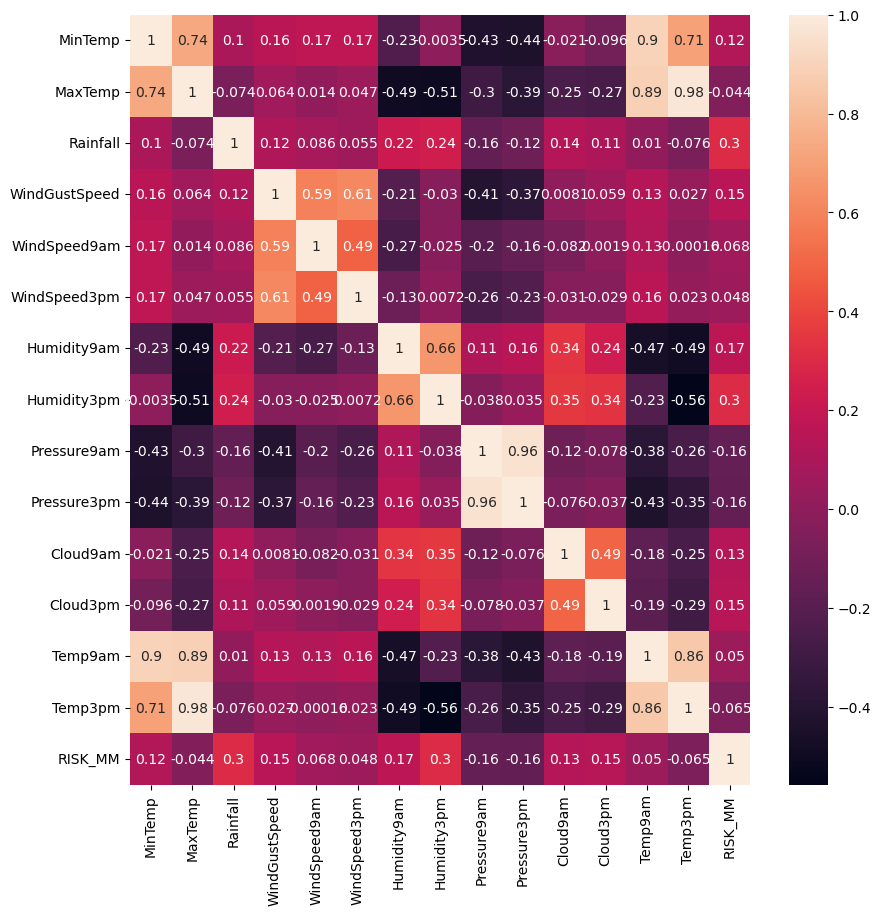

In [12]:
# build a heatmap dipalying the correlation of the dataframe

fig = plt.figure(figsize = (10,10))
sns.heatmap(AUS_droped_duplicates.corr(),annot = True)
plt.show()

In [13]:
ausvif = AUS_droped_duplicates.drop(columns = ['WindSpeed9am', 'WindSpeed3pm'])

ausvif.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,44.0,25.0,1010.6,1007.8,8.0,0.0,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
# drop categorical data 

vif = ausvif.drop(columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
                            'RainTomorrow'])
vif.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,44.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0.0
1,7.4,25.1,0.0,44.0,44.0,25.0,1010.6,1007.8,8.0,0.0,17.2,24.3,0.0
2,12.9,25.7,0.0,46.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,24.0,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,1.0
4,17.5,32.3,1.0,41.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2


In [16]:
vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])]
vif_df['variable'] = vif.columns
vif_df

,VIF,variable
0,38.692253,MinTemp
1,384.321879,MaxTemp
2,1.282085,Rainfall
3,11.086794,WindGustSpeed
4,46.861578,Humidity9am
5,38.107748,Humidity3pm
6,363461.041740,Pressure9am
7,361655.547104,Pressure3pm
8,5.559665,Cloud9am
9,5.330984,Cloud3pm


In [18]:
# drop columns witha vif score < 10 

aus = AUS_droped_duplicates.drop(columns = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'Pressure9am',
                                            'Pressure3pm', 'Temp9am', 'Temp3pm', 
                                            'Humidity9am', 'Humidity3pm'])

aus.head()

,Date,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,0.6,W,W,WNW,20.0,24.0,8.0,0.0,No,0.0,No
1,2008-12-02,Albury,0.0,WNW,NNW,WSW,4.0,22.0,8.0,0.0,No,0.0,No
2,2008-12-03,Albury,0.0,WSW,W,WSW,19.0,26.0,8.0,2.0,No,0.0,No
3,2008-12-04,Albury,0.0,NE,SE,E,11.0,9.0,8.0,2.0,No,1.0,No
4,2008-12-05,Albury,1.0,W,ENE,NW,7.0,20.0,7.0,8.0,No,0.2,No


In [19]:
# removing day from date column 

aus['Date'] = pd.to_datetime(aus['Date'], dayfirst=True)

aus['Date'] = aus['Date'].astype(str).str.replace('-', '')

aus['Date'] = np.where(aus['Date'].str.contains('/'), 
                                    pd.to_datetime(aus['Date']).dt.strftime('%m/%Y'), 
                                    pd.to_datetime(aus['Date'], dayfirst=True).dt.strftime('%m/%Y'))

aus.head()

,Date,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow
0,12/2008,Albury,0.6,W,W,WNW,20.0,24.0,8.0,0.0,No,0.0,No
1,12/2008,Albury,0.0,WNW,NNW,WSW,4.0,22.0,8.0,0.0,No,0.0,No
2,12/2008,Albury,0.0,WSW,W,WSW,19.0,26.0,8.0,2.0,No,0.0,No
3,12/2008,Albury,0.0,NE,SE,E,11.0,9.0,8.0,2.0,No,1.0,No
4,12/2008,Albury,1.0,W,ENE,NW,7.0,20.0,7.0,8.0,No,0.2,No


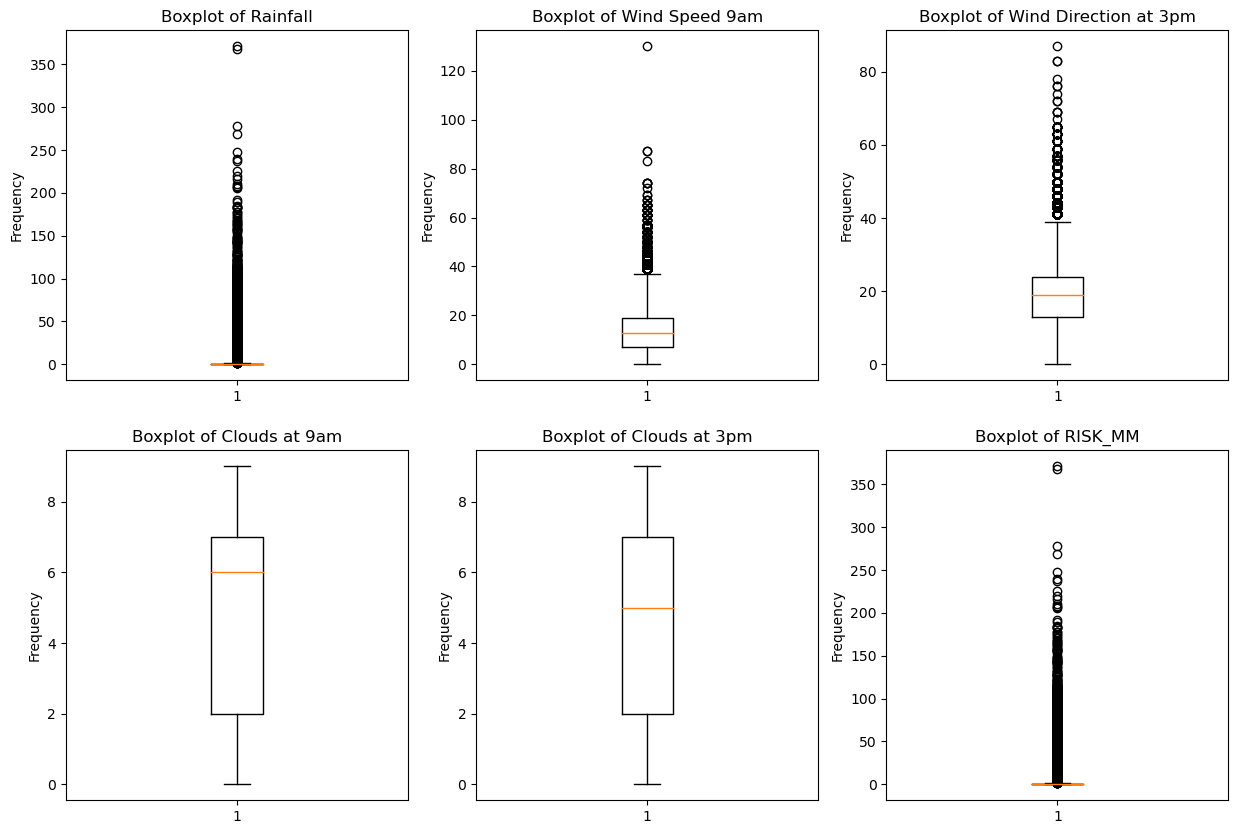

In [20]:
fig= plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
plt.boxplot(aus['Rainfall'])
plt.ylabel('Frequency')
plt.title('Boxplot of Rainfall')

plt.subplot(2,3,2)
plt.boxplot(aus['WindSpeed9am'])
plt.ylabel('Frequency')
plt.title('Boxplot of Wind Speed 9am')

plt.subplot(2,3,3)
plt.boxplot(aus['WindSpeed3pm'])
plt.ylabel('Frequency')
plt.title('Boxplot of Wind Direction at 3pm')

plt.subplot(2,3,4)
plt.boxplot(aus['Cloud9am'])
plt.ylabel('Frequency')
plt.title('Boxplot of Clouds at 9am')

plt.subplot(2,3,5)
plt.boxplot(aus["Cloud3pm"])
plt.ylabel('Frequency')
plt.title('Boxplot of Clouds at 3pm')

plt.subplot(2,3,6)
plt.boxplot(aus['RISK_MM'])
plt.ylabel('Frequency')
plt.title('Boxplot of RISK_MM');

plt.show()

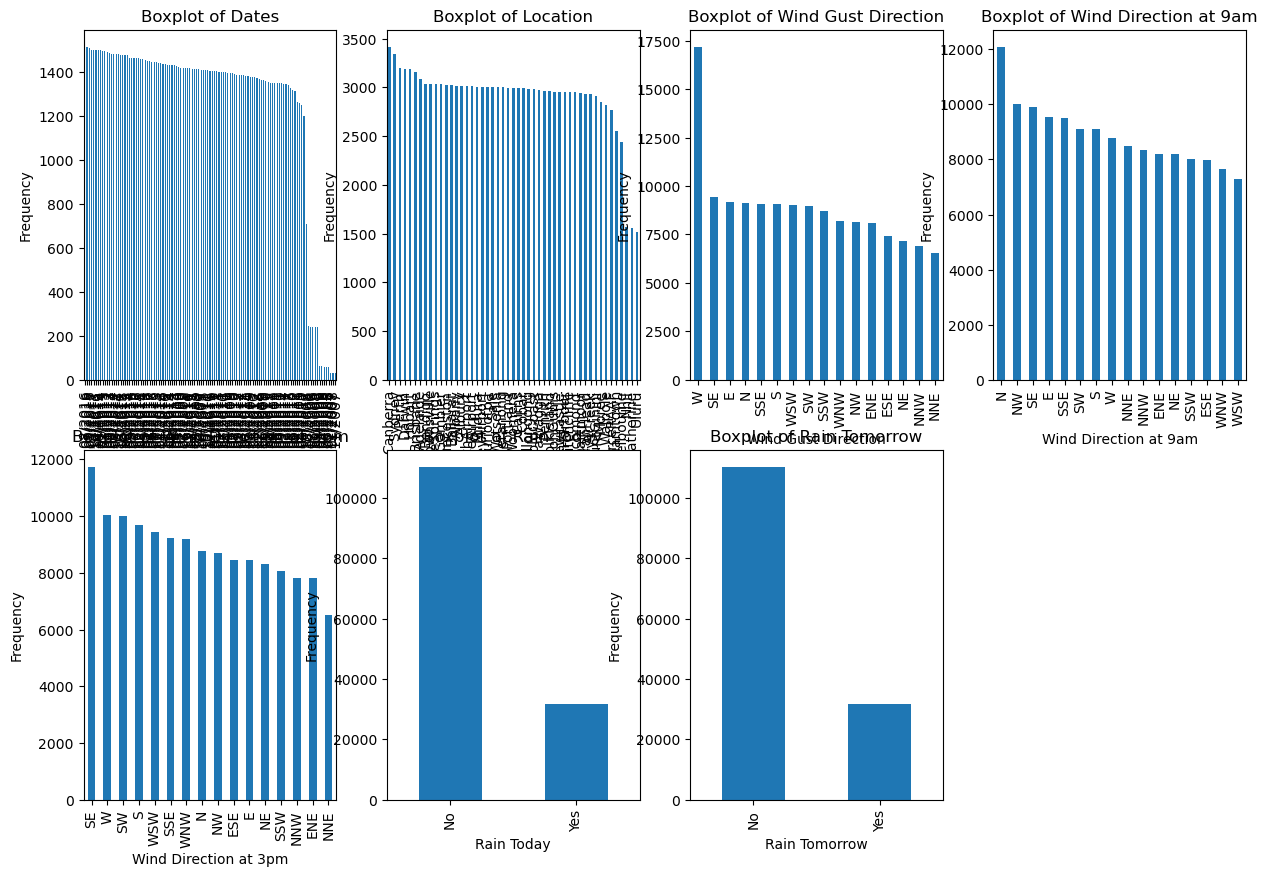

In [21]:
fig= plt.figure(figsize = (15,10))
plt.subplot(2,4,1)
aus["Date"].value_counts().plot(kind= 'bar')
plt.xlabel("Dates")
plt.ylabel("Frequency")
plt.title("Boxplot of Dates")

plt.subplot(2,4,2)
aus["Location"].value_counts().plot(kind= 'bar')
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.title("Boxplot of Location")

plt.subplot(2,4,3)
aus["WindGustDir"].value_counts().plot(kind= 'bar')
plt.xlabel("Wind Gust Direction")
plt.ylabel("Frequency")
plt.title("Boxplot of Wind Gust Direction")

plt.subplot(2,4,4)
aus["WindDir9am"].value_counts().plot(kind= 'bar')
plt.xlabel("Wind Direction at 9am")
plt.ylabel("Frequency")
plt.title("Boxplot of Wind Direction at 9am")

plt.subplot(2,4,5)
aus["WindDir3pm"].value_counts().plot(kind= 'bar')
plt.xlabel("Wind Direction at 3pm")
plt.ylabel("Frequency")
plt.title("Boxplot of Wind Direction at 3pm")

plt.subplot(2,4,6)
aus["RainToday"].value_counts().plot(kind= 'bar')
plt.xlabel("Rain Today")
plt.ylabel("Frequency")
plt.title("Boxplot of Rain Today")
          
plt.subplot(2,4,7)
aus["RainTomorrow"].value_counts().plot(kind= 'bar')
plt.xlabel("Rain Tomorrow")
plt.ylabel("Frequency")
plt.title("Boxplot of Rain Tomorrow")

plt.show()